<a href="https://colab.research.google.com/github/meerilahi/algoTrading/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install alpha_vantage

In [2]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
API_KEY = "XM0ZE0M05HEDFVTP"
ts = TimeSeries(key = API_KEY, output_format = 'pandas')
data = ts.get_daily(symbol = 'MSFT', outputsize = 'full')[0]

In [29]:
df = data[['5. volume','4. close']]
df = df.rename(columns = {'5. volume':'volume','4. close':'close'})
df = df[::-1]
df['pred'] = df['close'].shift(-1)
df = df.dropna()
df['diff'] = df['pred'] - df['close']
df.head()

,volume,close,pred,diff
date,,,,
1999-11-01,26630600.0,92.37,92.56,0.19
1999-11-02,23174500.0,92.56,92.00,-0.56
1999-11-03,22258500.0,92.00,91.75,-0.25
1999-11-04,27119700.0,91.75,91.56,-0.19
1999-11-05,35083700.0,91.56,89.94,-1.62


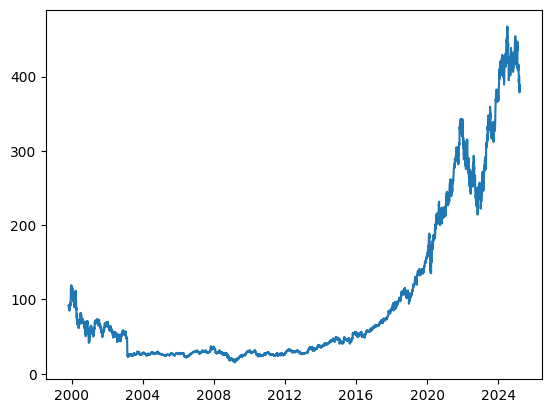

In [23]:
plt.plot(df.index,df.close)